<a href="https://colab.research.google.com/github/wisamabdullah85/Machine-Learning-BitCoin/blob/main/bitcoinwithcorrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer

In [39]:
# قراءة ملف CSV
data = pd.read_csv('/content/datasetbcfinalmiss.csv')


In [40]:
data['Last Price'].fillna(0, inplace = True)
data['Size'].fillna(0, inplace = True)

In [41]:
print(data.isnull().sum())

Last Price        0
Open Price        0
Max               0
Min               0
Size              0
Change Persent    0
Class             0
dtype: int64


In [42]:
data.shape

(2740, 7)

In [43]:
data.head()

,Last Price,Open Price,Max,Min,Size,Change Persent,Class
0,3597.2,3785.7,4070.5,3561.3,3.80,0.0497,Bitcoin
1,3677.8,3597.3,3715.2,3473.2,3.50,0.0224,Bitcoin
2,3570.9,3676.2,3699.1,3465.2,3.16,0.0291,Bitcoin
3,3502.5,3570.9,3583.2,3368.2,3.68,0.0192,Bitcoin
4,3661.4,3502.3,3721.1,3382.5,3.78,0.0454,Bitcoin


In [44]:
data.drop_duplicates()

,Last Price,Open Price,Max,Min,Size,Change Persent,Class
0,3597.2000,3785.7000,4070.5000,3561.3000,3.80,0.0497,Bitcoin
1,3677.8000,3597.3000,3715.2000,3473.2000,3.50,0.0224,Bitcoin
2,3570.9000,3676.2000,3699.1000,3465.2000,3.16,0.0291,Bitcoin
3,3502.5000,3570.9000,3583.2000,3368.2000,3.68,0.0192,Bitcoin
4,3661.4000,3502.3000,3721.1000,3382.5000,3.78,0.0454,Bitcoin
...,...,...,...,...,...,...,...
2735,0.0000,0.9999,1.0035,0.9991,458.29,0.0000,USD Coin
2736,1.0000,0.9999,1.0004,0.9996,420.68,0.0000,USD Coin
2737,1.0001,1.0000,1.0002,0.9995,352.21,10000.0000,USD Coin
2738,1.0004,1.0001,1.0007,0.9999,353.85,40000.0000,USD Coin


In [45]:
data.describe()

,Last Price,Open Price,Max,Min,Size,Change Persent
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,1941.861254,1937.333705,2088.396625,1781.707454,113.478259,5474.532281
std,7885.069512,7881.037024,8474.909262,7241.345498,216.426900,16252.399715
min,0.000000,0.001687,0.001925,0.001291,0.000000,0.000000
25%,0.996500,0.998400,1.000300,0.985375,4.807500,0.024300
50%,2.361955,2.398770,2.785490,2.135680,15.380000,0.072500
75%,138.937000,141.187500,156.156500,121.655000,96.627500,0.183475
max,64398.600000,64397.200000,68990.600000,61347.200000,992.610000,90000.000000


In [46]:
# تقسيم البيانات إلى متغيرات التنبؤ والتصنيف
X = data.drop('Class', axis=1)
y = data['Class']

In [47]:
# تقسيم البيانات إلى بيانات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# معالجة البيانات: التحويل القياسي
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# التصنيف الشجري
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)
tree_pred = tree_clf.predict(X_test_scaled)

In [50]:
# المنطق اللوجستي
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

In [51]:
# تصنيف الجيرسي
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

In [52]:
# التصنيف العشوائي
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

In [53]:
# حساب confusion matrix لكل نموذج
tree_cm = confusion_matrix(y_test, tree_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

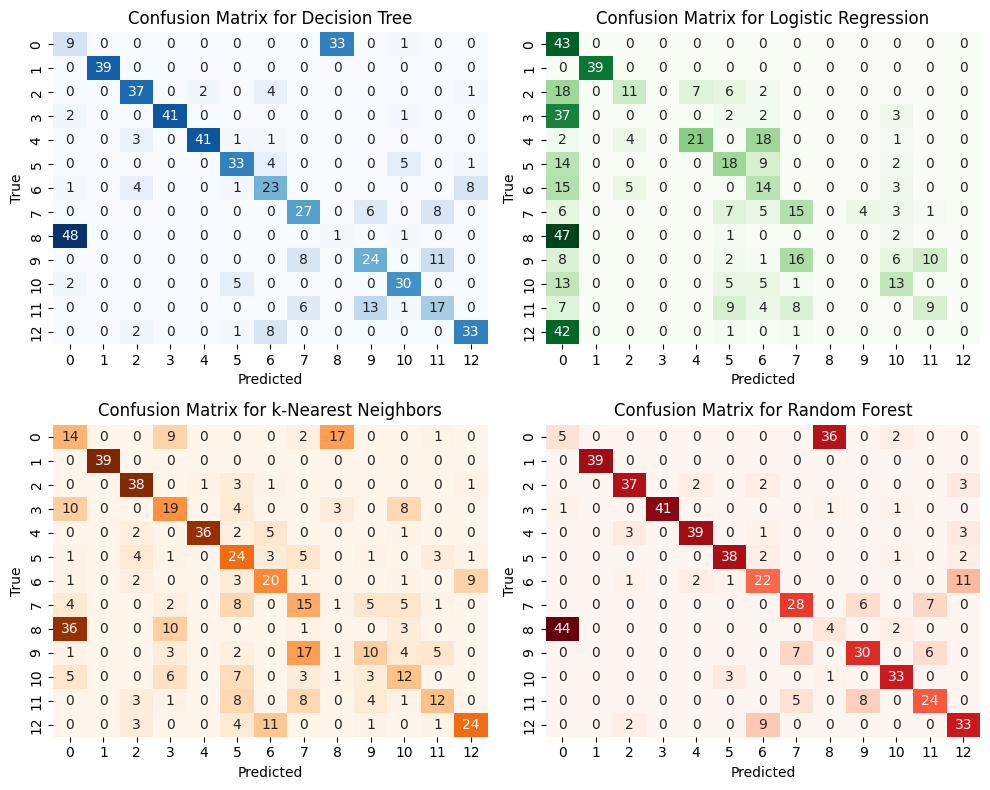

In [54]:
# رسم confusion matrix
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 2)
sns.heatmap(log_reg_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 3)
sns.heatmap(knn_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('Confusion Matrix for k-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 4)
sns.heatmap(rf_cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [55]:
# حساب دقة كل نموذج
tree_accuracy = accuracy_score(y_test, tree_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Accuracy for Decision Tree:", tree_accuracy)
print("Accuracy for Logistic Regression:", log_reg_accuracy)
print("Accuracy for k-Nearest Neighbors:", knn_accuracy)
print("Accuracy for Random Forest:", rf_accuracy)


Accuracy for Decision Tree: 0.6478102189781022
Accuracy for Logistic Regression: 0.33394160583941607
Accuracy for k-Nearest Neighbors: 0.47992700729927007
Accuracy for Random Forest: 0.6806569343065694


<ipython-input-56-e17c3f00e5b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


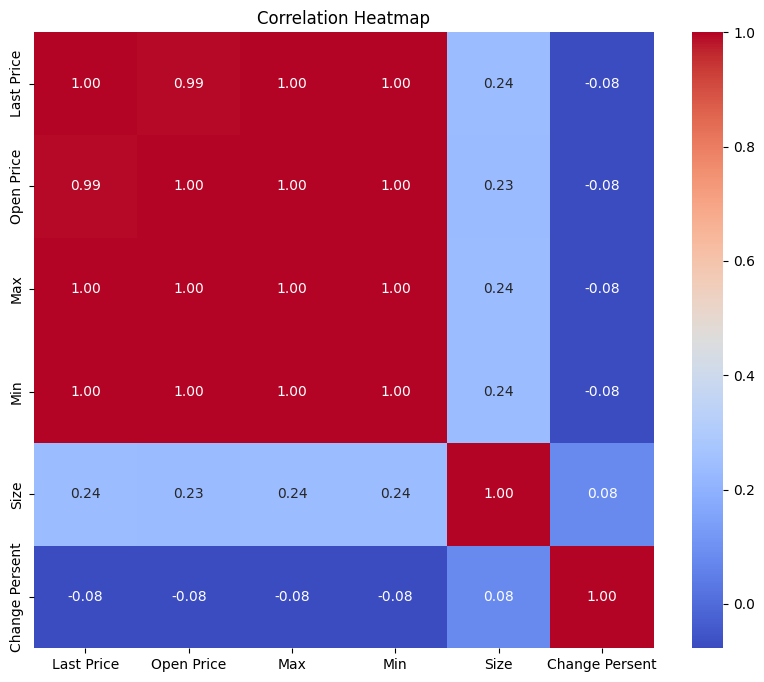

In [56]:
# حساب معامل الارتباط
correlation_matrix = data.corr()

# رسم heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()